# Show results

- File 2019-09-24T00_49_34.734985_F_2019-09-22T04_49_13.377946_scan_0007_pil1m_0000_integ_step_fit.h5
- Force: 0mN


In [47]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [48]:
#args:  TiAlN_as_deposit/2019-09-22T04_49_13.377946_scan_0007_pil1m_0000_integ_step.h5 -1 -1 -1 -1 71 [0,1,2,3,6,7,8,9,10,11,12,13,14] 2.61 2.74


In [49]:
sample_path='/data/visitors/nanomax/20190570/2019052208/process/TiAlN_as_deposit/'
filename='2019-09-24T00_49_34.734985_F_2019-09-22T04_49_13.377946_scan_0007_pil1m_0000_integ_step_fit.h5'

# with h5py.File(self.data_input_file,'r') as h5f:
#            q_array = h5f["/entry/integ/q"][()]
#            integration_array = h5f["/entry/integ/data"][()]
#            sigma_array = h5f["/entry/integ/sigma"][()]
#            azimuth_array =h5f[ "/entry/integ/azimuth_range"][()]

source=sample_path+filename

In [50]:
!h5dump -H /data/visitors/nanomax/20190570/2019052208/process/TiAlN_as_deposit/2019-09-24T00_49_34.734985_F_2019-09-22T04_49_13.377946_scan_0007_pil1m_0000_integ_step_fit.h5

HDF5 "/data/visitors/nanomax/20190570/2019052208/process/TiAlN_as_deposit/2019-09-24T00_49_34.734985_F_2019-09-22T04_49_13.377946_scan_0007_pil1m_0000_integ_step_fit.h5" {
GROUP "/" {
   GROUP "entry" {
      GROUP "fit" {
         ATTRIBUTE "origin" {
            DATATYPE  H5T_STRING {
               STRSIZE H5T_VARIABLE;
               STRPAD H5T_STR_NULLTERM;
               CSET H5T_CSET_UTF8;
               CTYPE H5T_C_S1;
            }
            DATASPACE  SCALAR
         }
         DATASET "chi_index" {
            DATATYPE  H5T_STD_I64LE
            DATASPACE  SIMPLE { ( 13 ) / ( 13 ) }
         }
         DATASET "ep" {
            DATATYPE  H5T_IEEE_F64LE
            DATASPACE  SIMPLE { ( 15, 3621, 29, 4 ) / ( 15, 3621, 29, 4 ) }
         }
         DATASET "get_ims_params" {
            DATATYPE  H5T_STD_I64LE
            DATASPACE  SIMPLE { ( 5 ) / ( 5 ) }
         }
         DATASET "irows" {
            DATATYPE  H5T_IEEE_F64LE
            DATASPACE  SIMPLE { ( 0 ) / ( 0

In [51]:
with h5py.File(source,'r') as h5f:
    p = h5f['/entry/fit/p'][()]

res = range(p.shape[1])
ncols = 71

def sample_transf(res,ncols):
    nrows = int(p.shape[1]/ncols)
    res_reshaped = np.reshape(res,(nrows,ncols))
    return np.fliplr(res_reshaped)

res_reshaped = sample_transf(res,ncols)
print(res_reshaped)

[[  70   69   68 ...    2    1    0]
 [ 141  140  139 ...   73   72   71]
 [ 212  211  210 ...  144  143  142]
 ...
 [3478 3477 3476 ... 3410 3409 3408]
 [3549 3548 3547 ... 3481 3480 3479]
 [3620 3619 3618 ... 3552 3551 3550]]


In [52]:
peak = 2
pp = p[:,:,peak,:] # peak params [chi,irows,params] [int,pos,whidth,shape]

bad_chis = [4,5]
good_chis = []
for i in range(pp.shape[0]):
    if i not in bad_chis:
        good_chis += [i,]

15


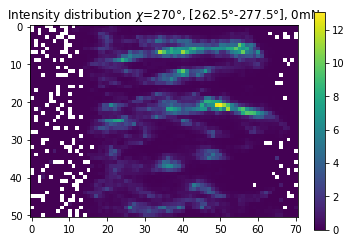

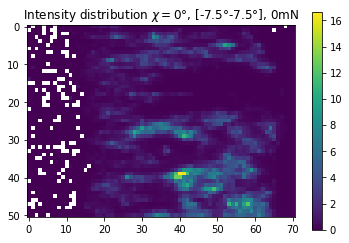

In [53]:
# show sample (intensity for 270deg integ)
# Comment: ##azimuth_range=np.array([  0,  15,  30,  45,  90, 140,180, 242,  270, 285, 300, 315, 330, 345,np.nan])

i0 = pp[8,:,0] # 2,3,4,5,9?,10,11?,12? is bad

print(pp.shape[0])
i0 = sample_transf(i0,ncols)

plt.imshow(i0)
plt.colorbar()
plt.title('i0 $\chi=$270$\degree$, [262.5$\degree$-277.5$\degree$] integration')
plt.title('Intensity distribution for $\chi=$270$\degree$, 0mN')
plt.title('Intensity distribution $\chi$=270$\degree$, [262.5$\degree$-277.5$\degree$], 0mN')
image_path='/mxn/home/gudlot/jupyter_notebooks/Images/UM/'+'Scan7_0mN_int_chi270'+'.pdf'
plt.savefig(image_path)
plt.show()

i0 = pp[0,:,0] # 2,3,4,5,9?,10,11?,12? is bad

i0 = sample_transf(i0,ncols)
plt.imshow(i0)
plt.colorbar()
plt.title('i0 $\chi=$0$\degree$, [-7.5$\degree$-7.5$\degree$] integration')
plt.title('Intensity distribution for $\chi=$0$\degree$, 0mN')
plt.title('Intensity distribution $\chi=$0$\degree$, [-7.5$\degree$-7.5$\degree$], 0mN')

image_path='/mxn/home/gudlot/jupyter_notebooks/Images/UM/'+'Scan7_0mN_int_chi0'+'.pdf'
plt.savefig(image_path)
plt.show()

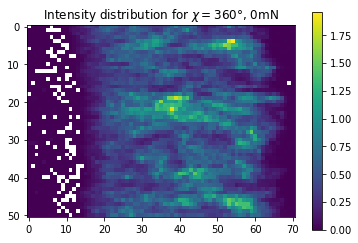

In [54]:
# show sample (intensity for 360deg integ)

#i0 = np.sum(pp[good_chis,:,0],axis=0)
i0 = pp[-1,:,0] # 2,3,4,5,9?,10,11?,12? is bad

i0 = sample_transf(i0,ncols)
plt.imshow(i0)
plt.colorbar()
plt.title('i0 360 deg integration')
plt.title('i0 360 deg integration')
plt.title('Intensity distribution for $\chi=$360$\degree$, 0mN')
image_path='/mxn/home/gudlot/jupyter_notebooks/Images/UM/'+'Scan7_0mN_int_chi360'+'.pdf'
plt.savefig(image_path)


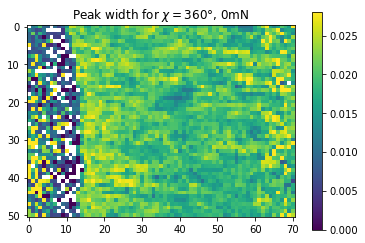

In [55]:
# show sample (width for 360deg integ)
val = pp[-1,:,2]

val = sample_transf(val,ncols)
plt.imshow(val)
plt.colorbar()
plt.title('peak widh 360 deg integ')
plt.title('Peak width for $\chi=$360$\degree$, 0mN')
image_path='/mxn/home/gudlot/jupyter_notebooks/Images/UM/'+'Scan7_0mN_111TiAlN_delta_d_chi360'+'.pdf'
plt.savefig(image_path)

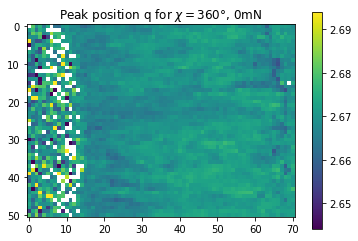

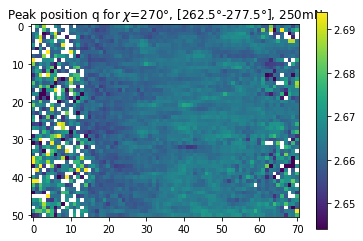

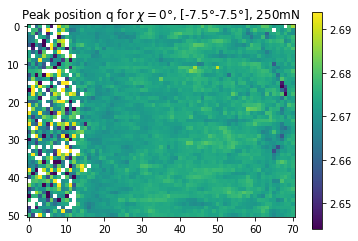

In [56]:
# show sample (position for 360deg integ)
val = pp[-1,:,1]

val = sample_transf(val,ncols)
plt.imshow(val)
plt.colorbar()
plt.title('peak position 360 deg integ')
plt.title('Peak position q for $\chi=$360$\degree$, 0mN')
image_path='/mxn/home/gudlot/jupyter_notebooks/Images/UM/'+'Scan7_0mN_111TiAlN_d_chi360'+'.pdf'
plt.savefig(image_path)
plt.show()


val = pp[8,:,1]
val = sample_transf(val,ncols)
plt.imshow(val)
plt.colorbar()
plt.title('Peak position q for $\chi=$270$\degree$, 0mN')
plt.title('Peak position q for $\chi$=270$\degree$, [262.5$\degree$-277.5$\degree$], 250mN')
image_path='/mxn/home/gudlot/jupyter_notebooks/Images/UM/'+'Scan7_0mN_111TiAlN_d_chi270'+'.pdf'
plt.savefig(image_path)
plt.show()

val = pp[0,:,1]
val = sample_transf(val,ncols)
plt.imshow(val)
plt.colorbar()
plt.title('Peak position q for $\chi=$0$\degree$, 0mN')
plt.title('Peak position q for $\chi=$0$\degree$, [-7.5$\degree$-7.5$\degree$], 250mN')
image_path='/mxn/home/gudlot/jupyter_notebooks/Images/UM/'+'Scan7_0mN_111TiAlN_d_chi0'+'.pdf'
plt.savefig(image_path)
plt.show()

#plt.title('Peak position q for $\chi$=270$\degree$, [262.5$\degree$-277.5$\degree$], 0mN')
#plt.title('Peak position q for $\chi=$0$\degree$, [-7.5$\degree$-7.5$\degree$], 0mN')



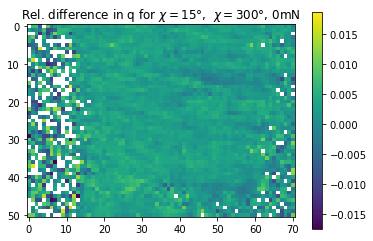

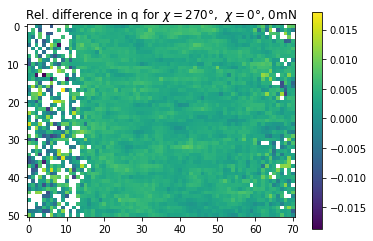

In [57]:
# show sample (position)
val0 = pp[10,:,1]
val1 = pp[1,:,1]

val = (val1-val0)/(val0+val1)*2.

val = sample_transf(val,ncols)
plt.imshow(val)
plt.colorbar()
plt.title('raltive difference of peak positions')
plt.title('Rel. difference in q for $\chi=$15$\degree$,  $\chi=$300$\degree$, 0mN')
image_path='/mxn/home/gudlot/jupyter_notebooks/Images/UM/'+'Scan7_0mN_111TiAlN_d_chi10_chi1'+'.pdf'
plt.savefig(image_path)
plt.show()

# show sample (position)
# Comment: ##azimuth_range=np.array([  0,  15,  30,  45,  90, 140,180, 242,  270, 285, 300, 315, 330, 345,np.nan])

#chi 8 is 270 deg
#chi 0 is 0 deg

val0 = pp[8,:,1]
val1 = pp[0,:,1]

val = (val1-val0)/(val0+val1)*2.

val = sample_transf(val,ncols)
plt.imshow(val)
plt.colorbar()
plt.title('Relative difference of peak positions')
plt.title('Rel. difference in q for $\chi=$270$\degree$,  $\chi=$0$\degree$, 0mN')
image_path='/mxn/home/gudlot/jupyter_notebooks/Images/UM/'+'Scan7_0mN_111TiAlN_d_chi8_chi0'+'.pdf'
plt.savefig(image_path)
plt.show()